In [23]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [24]:
N = 50 
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [25]:
kappa = 1.0                     # strength of the doublet
x_doublet, y_doublet = 0, 0     # location of the doublet

u_inf = 1.0                     # freestream speed

In [33]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by the doublet
    
    Parameters
    ----------
    strength: float
        strength of the doublet
    xd: float
        x-coordinate of the doublet
    yd: float
        y-coordinate of the doublet
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the velocity field
    v: 2D numpy array of floats
        y-component of the velocity field
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream function generated by the doublet
    
    Parameters
    ----------
    strength: float
        strength of the doublet
    xd: float
        x-coordinate of the doublet
    yd: float
        y-coordinate of the doublet
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    psi: 2D numpy array of floats
        the stream function
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

## Compute everything and add freestream to the doublet to get flow around a cylinder

In [34]:
# compute the velocity field
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream function
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)

# stream function of freestream
psi_freestream = u_inf * Y

#superposition of doublet on freestream
u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet + psi_freestream

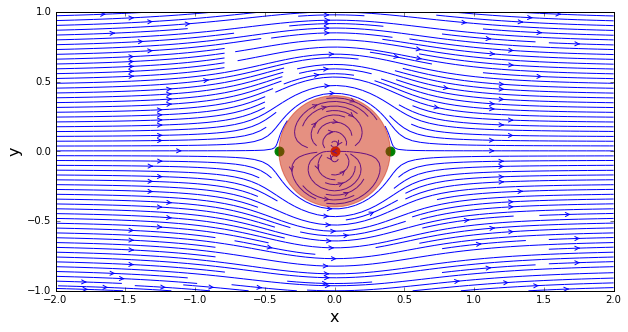

In [36]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

#calculate radius and add cylinder
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = pyplot.Circle((0,0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

# calculate the stagnation points and add them
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)),0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)),0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

## Add vortex and calculate the velocity and stream function

In [37]:
gamma = 4.0                          # vortex strength
x_vortex, y_vortex = 0, 0            # vortex location

In [38]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by the vortex
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
        
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the velocity field
    v: 2D numpy array of floats
        y-component of the velocity field
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream function generated by the vortex
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    psi: 2D numpy array of floats
        the stream function of the vortex
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

In [39]:
# compute the velocity field on the grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream function on the grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

In [40]:
# superposition of doublet and vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

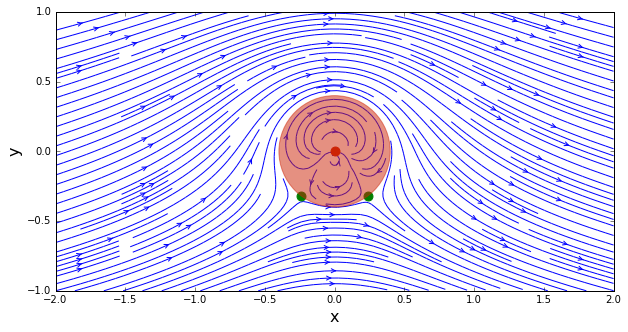

In [42]:
# calculate the cylinder radius
R = math.sqrt(kappa/(2*math.pi*u_inf))

# calculate stagnation points
x_stagn1, y_stagn1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)
x_stagn2, y_stagn2 = -math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)

# plot streamlines and cylinder
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
circle = pyplot.Circle((0,0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');